In [197]:
%%capture
import warnings
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated.*', category=FutureWarning)



In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [199]:
df = pd.read_csv('DSGames/Games.csv')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [201]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Year          16450 non-null  float64
 3   Genre         16717 non-null  object 
 4   Publisher     16665 non-null  object 
 5   NA            16719 non-null  float64
 6   EU            16719 non-null  float64
 7   JP            16719 non-null  float64
 8   Other         16719 non-null  float64
 9   Global        16719 non-null  float64
 10  Critic_Score  8137 non-null   float64
 11  Critic_Count  8137 non-null   float64
 12  User_Score    10015 non-null  object 
 13  User_Count    7590 non-null   float64
 14  Developer     10096 non-null  object 
 15  Rating        9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [203]:
df = df.dropna(how='any', subset=['Platform','Year'])


In [204]:
for el in  ['Platform', 'Genre']:
    df[el] = df[el].astype('category')
df['Year'] = df['Year'].astype('int64')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16448 non-null  object  
 1   Platform      16450 non-null  category
 2   Year          16450 non-null  int64   
 3   Genre         16448 non-null  category
 4   Publisher     16418 non-null  object  
 5   NA            16450 non-null  float64 
 6   EU            16450 non-null  float64 
 7   JP            16450 non-null  float64 
 8   Other         16450 non-null  float64 
 9   Global        16450 non-null  float64 
 10  Critic_Score  7983 non-null   float64 
 11  Critic_Count  7983 non-null   float64 
 12  User_Score    7463 non-null   float64 
 13  User_Count    7463 non-null   float64 
 14  Developer     9907 non-null   object  
 15  Rating        9769 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          16448 non-null  object  
 1   Platform      16450 non-null  category
 2   Year          16450 non-null  int64   
 3   Genre         16448 non-null  category
 4   Publisher     16418 non-null  object  
 5   NA            16450 non-null  float64 
 6   EU            16450 non-null  float64 
 7   JP            16450 non-null  float64 
 8   Other         16450 non-null  float64 
 9   Global        16450 non-null  float64 
 10  Critic_Score  7983 non-null   float64 
 11  Critic_Count  7983 non-null   float64 
 12  User_Score    7463 non-null   float64 
 13  User_Count    7463 non-null   float64 
 14  Developer     9907 non-null   object  
 15  Rating        9769 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [206]:
df.dtypes

Name              object
Platform        category
Year               int64
Genre           category
Publisher         object
NA               float64
EU               float64
JP               float64
Other            float64
Global           float64
Critic_Score     float64
Critic_Count     float64
User_Score       float64
User_Count       float64
Developer         object
Rating            object
dtype: object

In [207]:
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.487356,0.264041,0.145909,0.078464,0.047582,0.536252,68.994363,26.441313,7.126330,163.015141
std,5.878995,0.818324,0.506639,0.311046,0.187973,1.558437,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [209]:
df.columns = df.columns.str.strip()

In [210]:
df.isnull().sum()

Name               2
Platform           0
Year               0
Genre              2
Publisher         32
NA                 0
EU                 0
JP                 0
Other              0
Global             0
Critic_Score    8467
Critic_Count    8467
User_Score      8987
User_Count      8987
Developer       6543
Rating          6681
dtype: int64

In [211]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)
df.dropna(axis = 0, inplace = True)

In [212]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA              0
EU              0
JP              0
Other           0
Global          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   category
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  Critic_Count  6824 non-null   float64 
 12  User_Score    6824 non-null   float64 
 13  User_Count    6824 non-null   float64 
 14  Developer     6824 non-null   object  
 15  Rating        6824 non-null   object  
dtypes: category(2), float64(9), int64(1), object(4)
memory usage: 814.7+ KB


In [214]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

In [215]:
df['Name'].isnull().sum()

0

In [216]:

df.dtypes

Name              object
Platform        category
Year               int64
Genre           category
Publisher         object
NA               float64
EU               float64
JP               float64
Other            float64
Global           float64
Critic_Score     float64
User_Score       float64
dtype: object

In [217]:
df.head(2)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,8.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,8.3


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   category
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  User_Score    6824 non-null   float64 
dtypes: category(2), float64(7), int64(1), object(2)
memory usage: 601.4+ KB


In [227]:
df['Genre'] = df['Genre'].astype('str')

In [228]:
df_1= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [229]:
evolved_sales = pd.melt(df_1, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

In [230]:
evolved_sales = evolved_sales.replace([np.inf, -np.inf], np.nan).dropna()

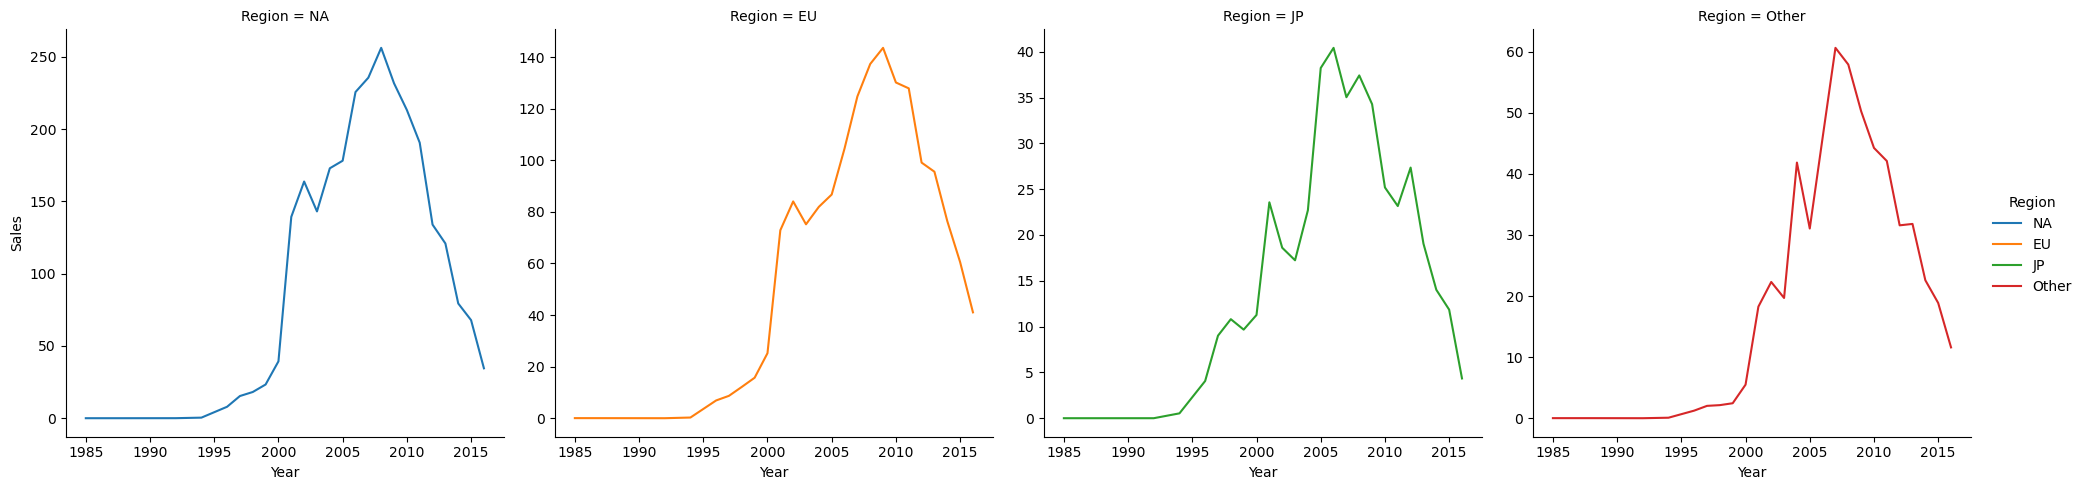

In [249]:
evolved_sales = evolved_sales[np.isfinite(evolved_sales['Year'])]
sns.relplot(x = 'Year', y = 'Sales', data = evolved_sales, hue = 'Region', col = 'Region', kind='line',facet_kws={"sharey": False} )


In [262]:
genre_sales = df.groupby(['Genre','Year'], observed=True)[['Global']].sum().reset_index()


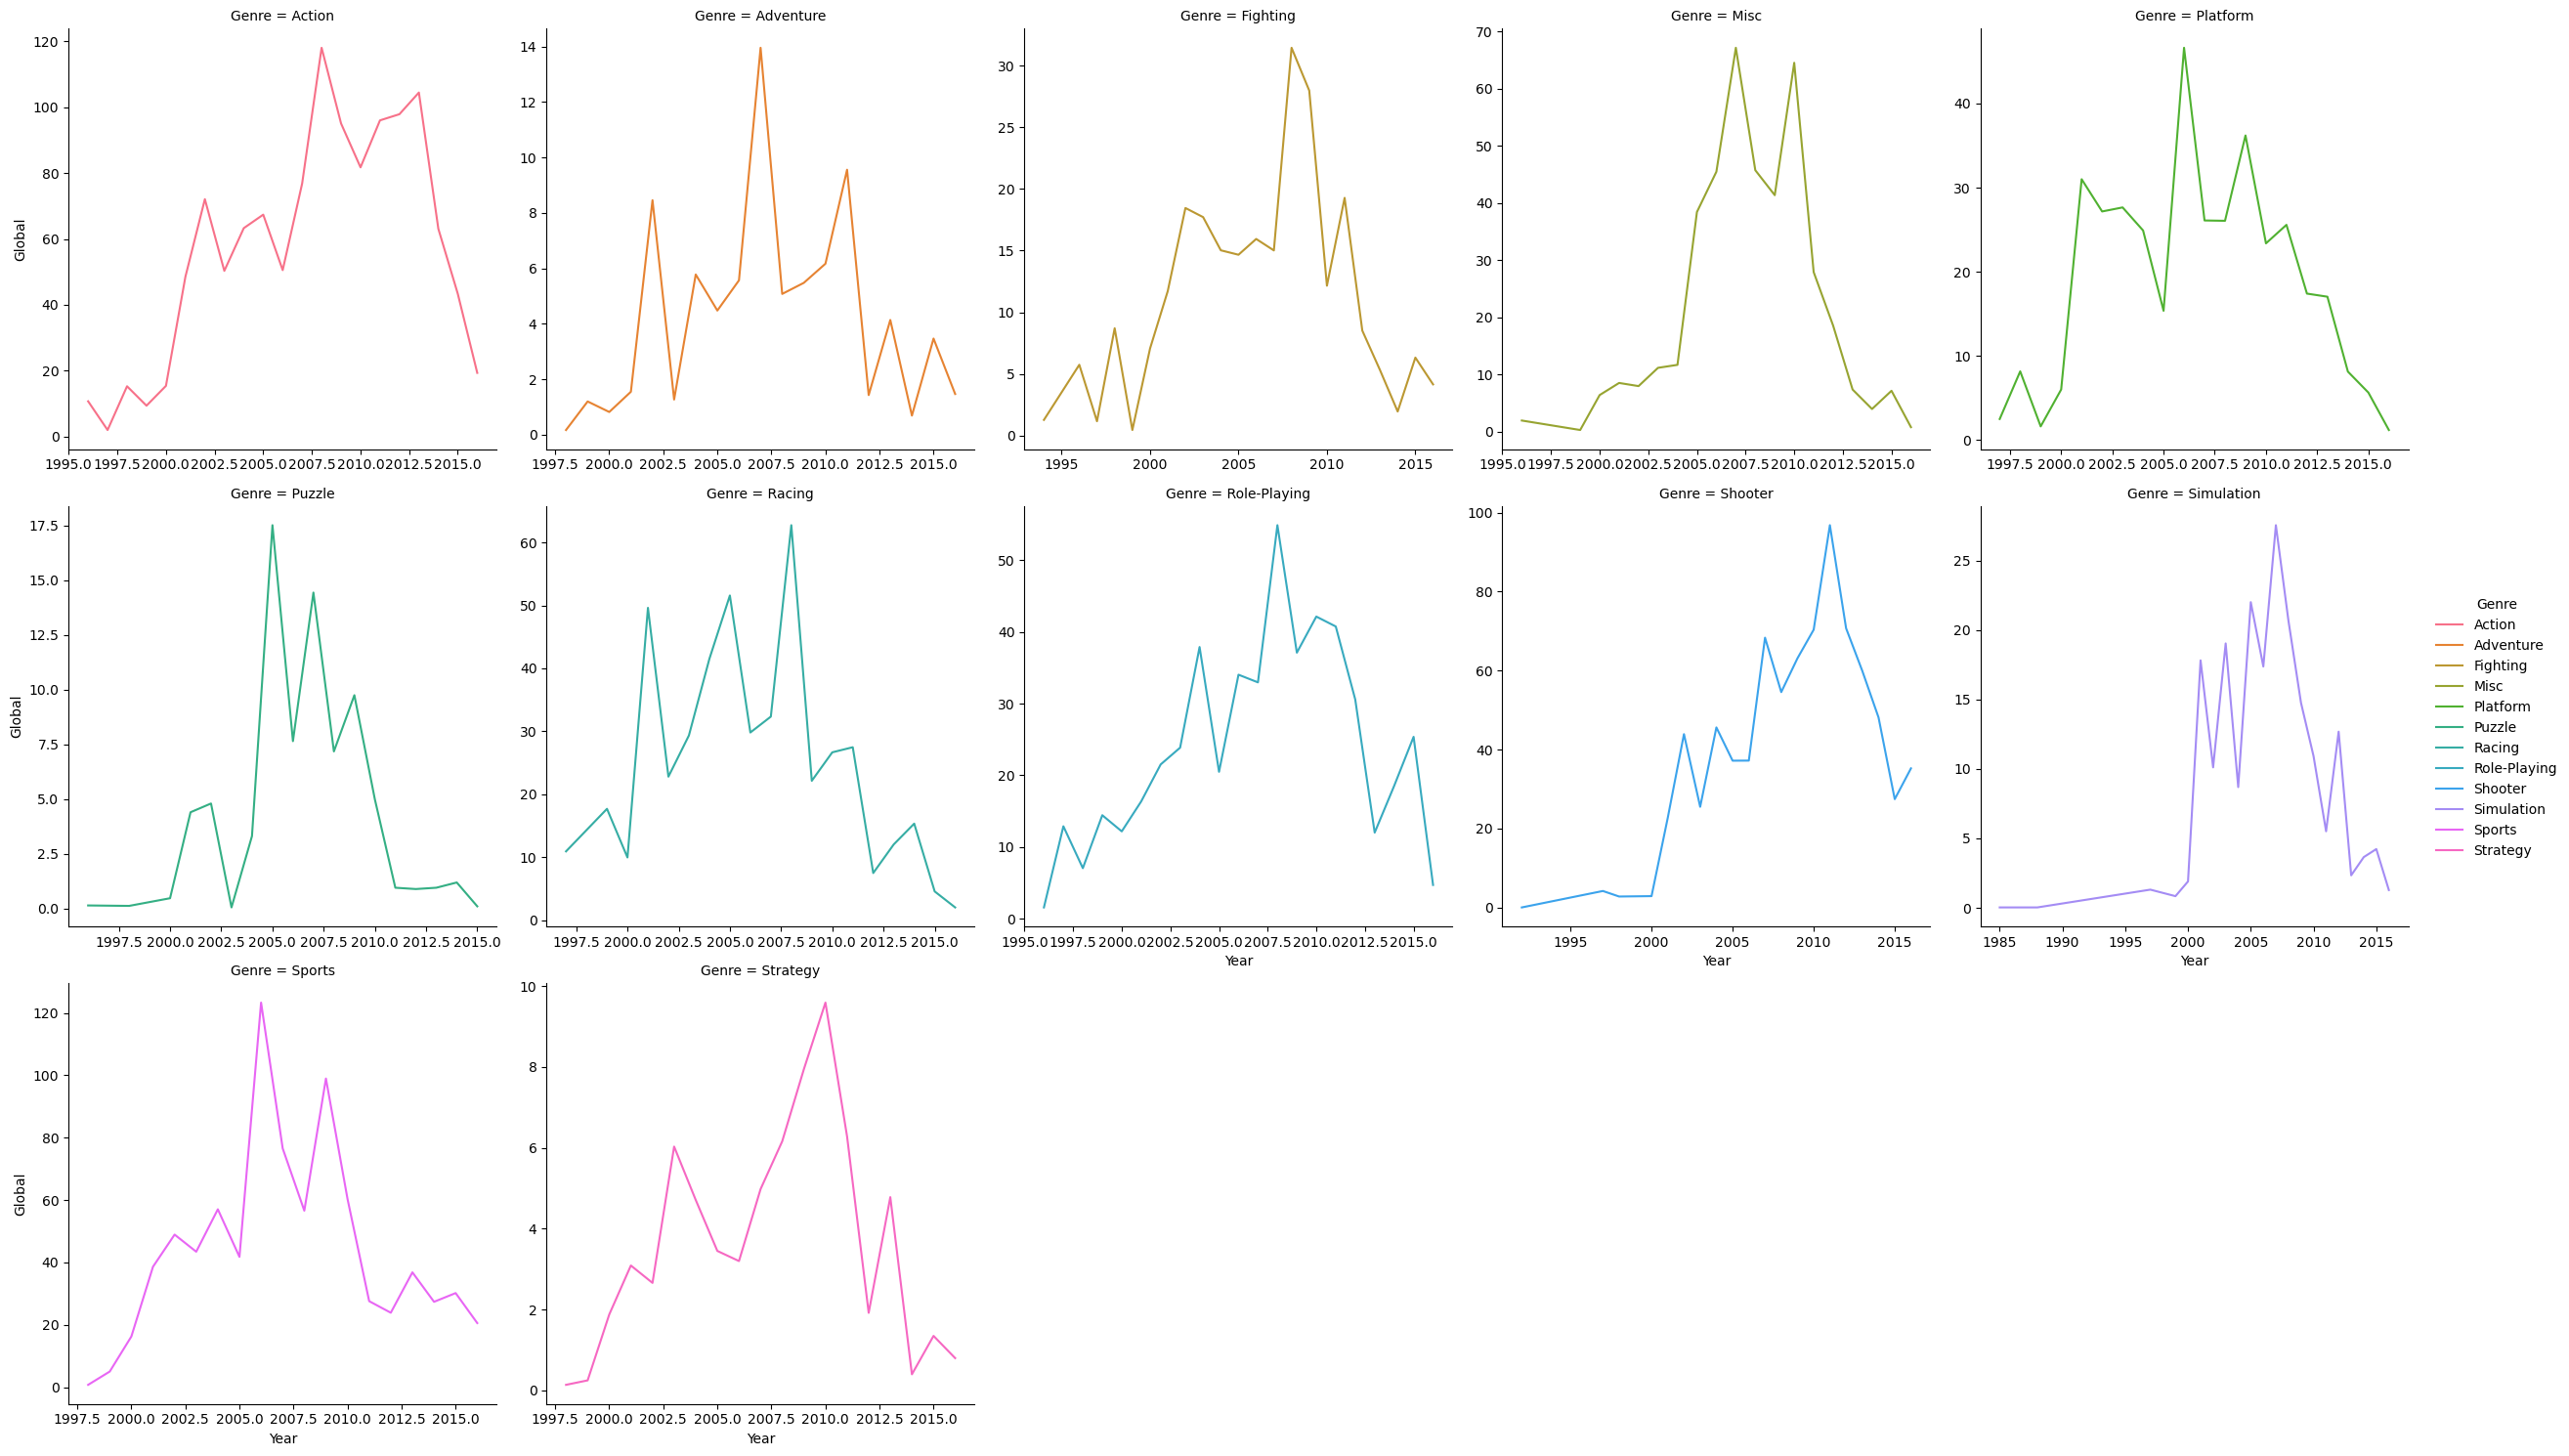

In [263]:
sns.relplot(data=genre_sales,  x="Year", y = 'Global',hue = 'Genre', col = 'Genre',kind = 'line', col_wrap=5,facet_kws={"sharex": False, "sharey": False} )

In [264]:
p_1 = df.groupby(['Platform','Year'], observed=True)[['Global']].sum().reset_index()
p_1['Platform'] = p_1['Platform'].astype(str).str.strip()

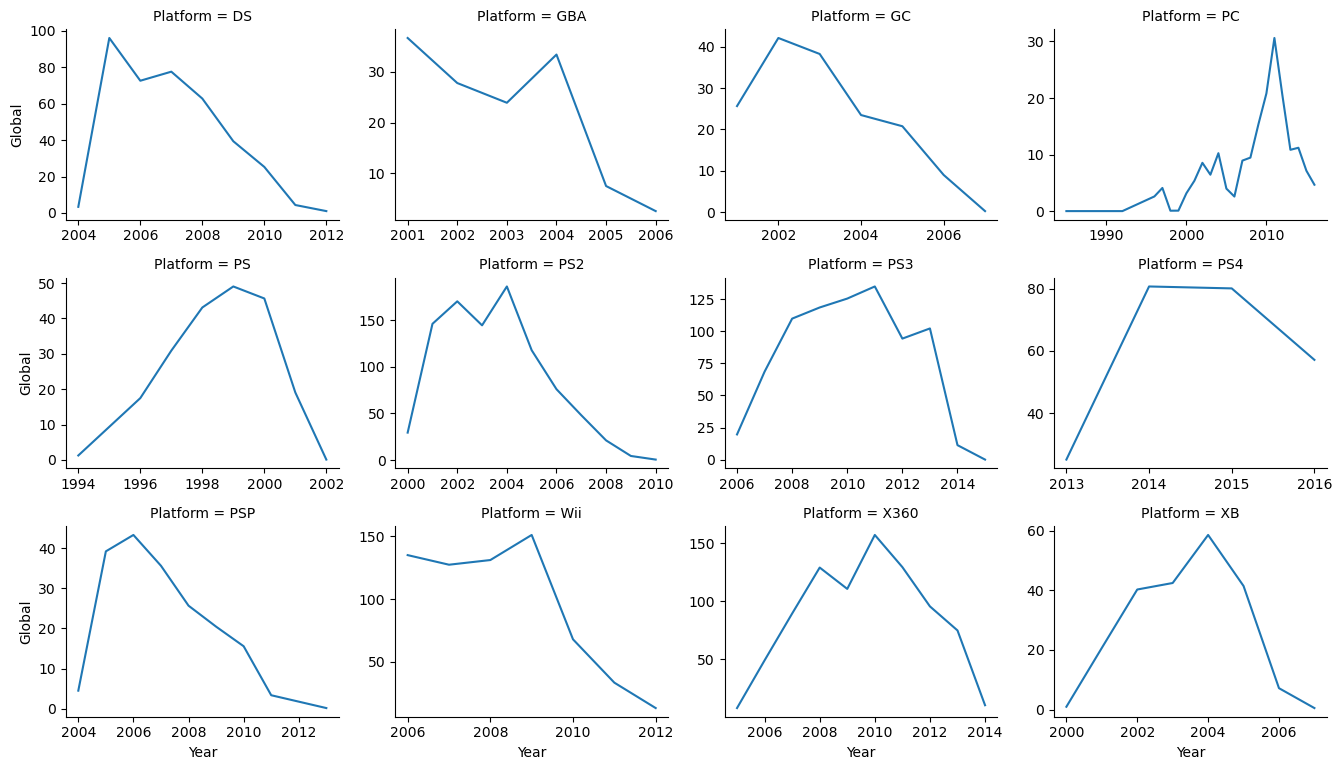

In [265]:
top_platform = df.groupby('Platform', observed=True)['Global'].sum().sort_values(ascending=False).head(12).index
top_platform = top_platform.tolist()
platform_sales = p_1[p_1['Platform'].isin(top_platform)]



g = sns.relplot(
    data=platform_sales, x='Year', y='Global',
    col='Platform', col_wrap=4, kind='line',
     facet_kws={"sharex": False, "sharey": False}, height=2.6, aspect=1.3
)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          6824 non-null   object  
 1   Platform      6824 non-null   category
 2   Year          6824 non-null   int64   
 3   Genre         6824 non-null   object  
 4   Publisher     6824 non-null   object  
 5   NA            6824 non-null   float64 
 6   EU            6824 non-null   float64 
 7   JP            6824 non-null   float64 
 8   Other         6824 non-null   float64 
 9   Global        6824 non-null   float64 
 10  Critic_Score  6824 non-null   float64 
 11  User_Score    6824 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 647.7+ KB


In [269]:
grouped_preferences= df.groupby(['Year','Genre'], observed = True)[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
melted_preferences = pd.melt(grouped_preferences, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [306]:
genre = df[['Genre', 'Global']]

In [307]:
grouped_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [308]:
top_genre = grouped_genre.groupby('Genre', observed = True)['Global'].sum().sort_values(ascending=False).head(5).index


In [312]:
genre_pref = melted_preferences[melted_preferences['Genre'].isin(top_genre)]

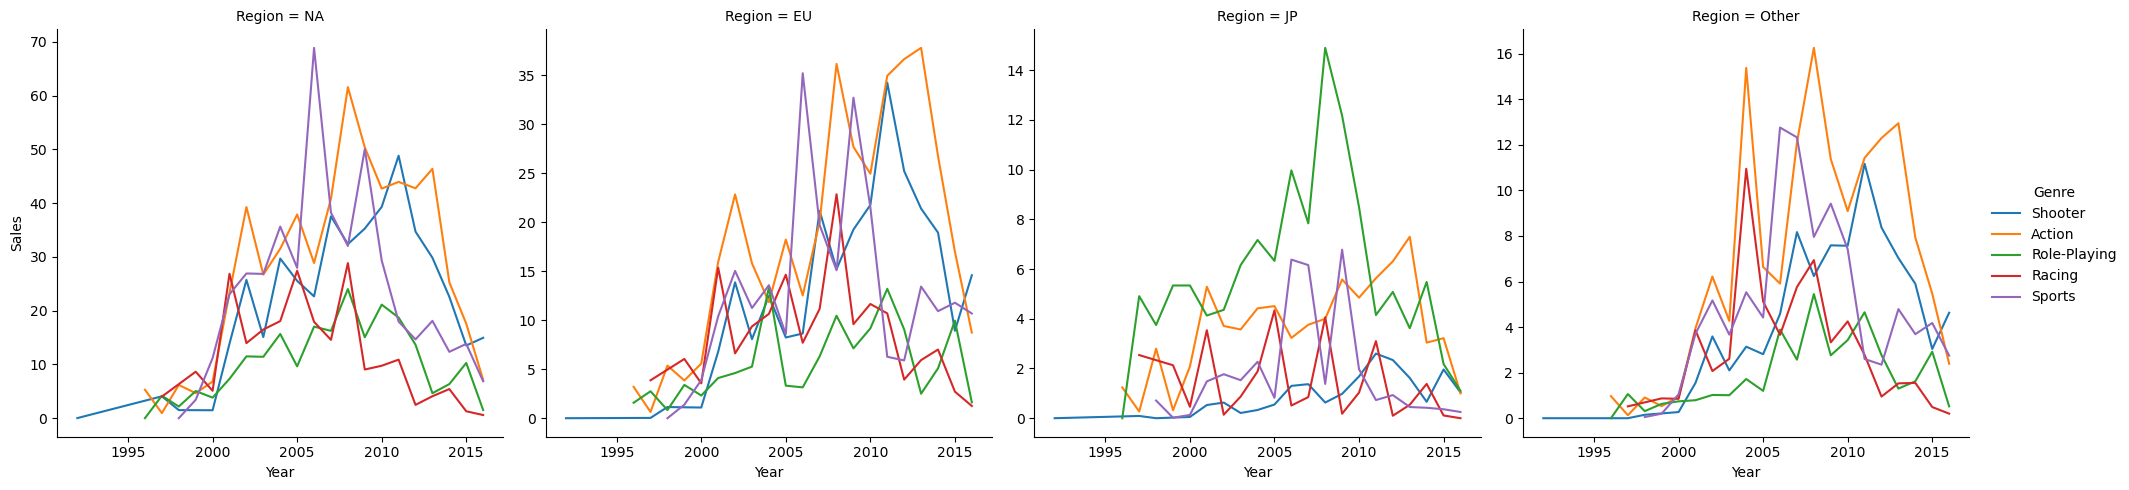

In [313]:
sns.relplot(x = 'Year', y = 'Sales', data = genre_pref, hue = 'Genre', col = 'Region', kind='line', facet_kws={'sharey': False, 'sharex': True})

In [314]:
critic = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]

In [315]:
critic = critic.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [316]:
critic

,Critic_Score,Genre,Region,Sales
0,76.0,Sports,NA,41.36
1,82.0,Racing,NA,15.68
2,80.0,Sports,NA,15.61
3,89.0,Platform,NA,11.28
4,58.0,Misc,NA,13.96
...,...,...,...,...
27291,46.0,Action,Other,0.00
27292,81.0,Fighting,Other,0.00
27293,80.0,Action,Other,0.00
27294,61.0,Shooter,Other,0.00


In [317]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing'], dtype='object', name='Genre')

In [318]:
grouped_genre

,Genre,Global
0,Action,1200.79
1,Adventure,80.75
2,Fighting,249.95
3,Misc,416.26
4,Platform,377.80
5,Puzzle,78.90
6,Racing,476.22
7,Role-Playing,501.37
8,Shooter,816.48
9,Simulation,202.70


In [319]:
critic = critic[critic['Genre'].isin(top_genre)]

In [345]:
critic= critic.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()
critic = critic[critic['Sales'] > 0]
critic

,Region,Genre,Critic_Score,Sales
0,EU,Action,24.0,0.03
1,EU,Action,25.0,0.02
2,EU,Action,26.0,0.13
3,EU,Action,27.0,0.04
4,EU,Action,29.0,0.02
...,...,...,...,...
1249,Other,Sports,93.0,1.52
1250,Other,Sports,94.0,1.06
1251,Other,Sports,95.0,0.58
1252,Other,Sports,97.0,0.48


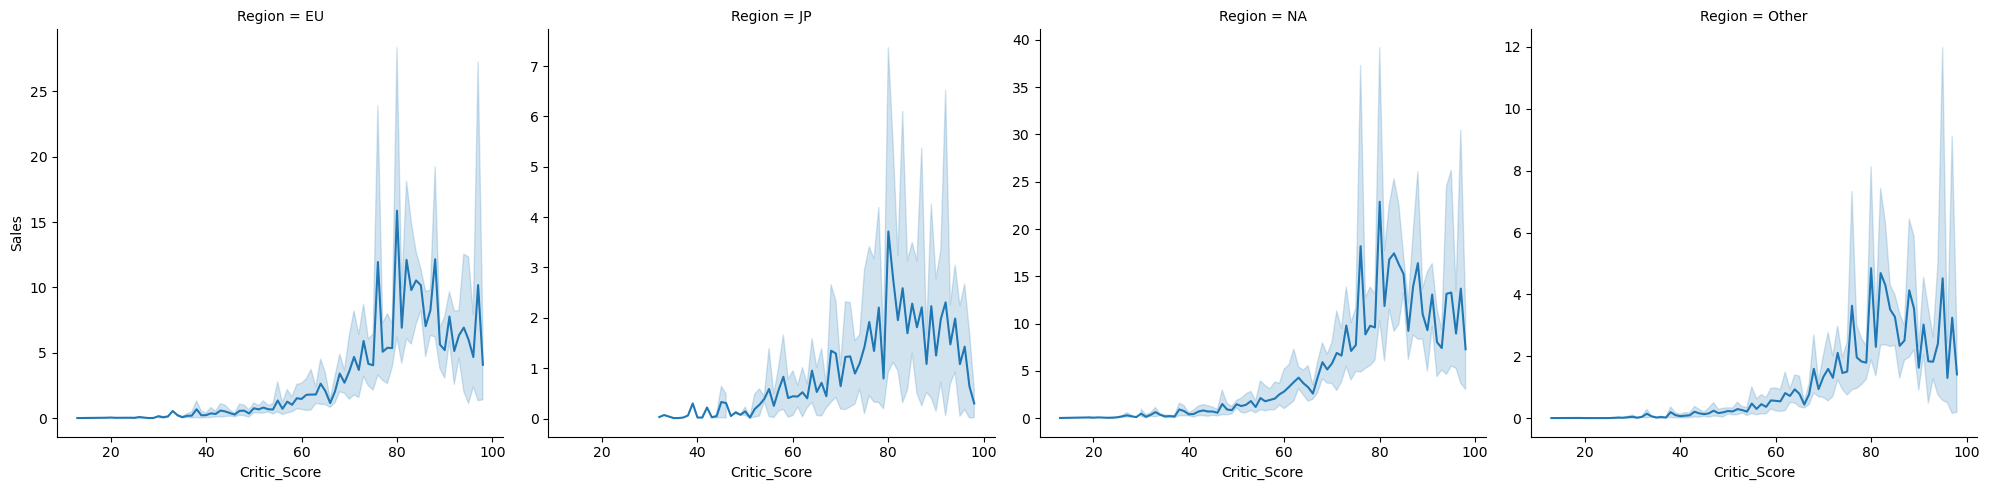

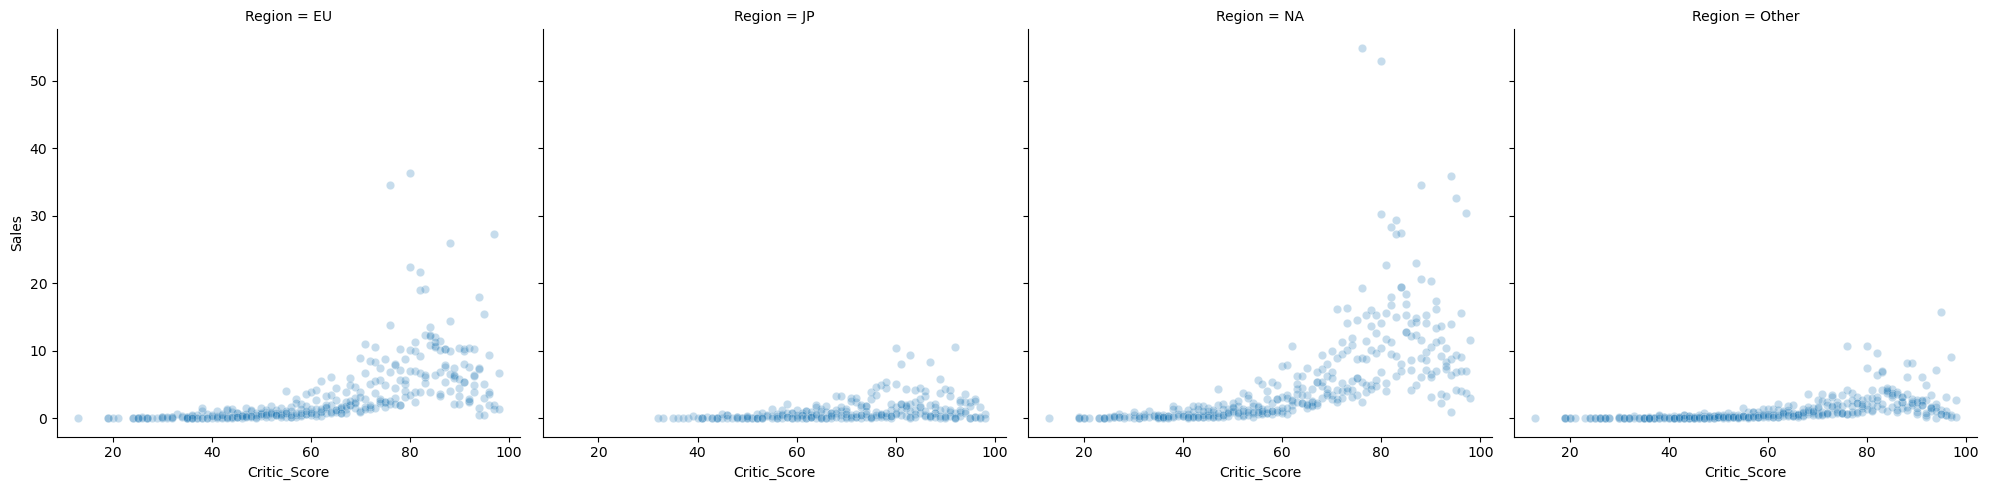

In [347]:
critic_score = sns.relplot(data = critic, x = 'Critic_Score', y = 'Sales', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})
g = sns.relplot(data=critic, x='Critic_Score', y='Sales',
                col='Region', kind='scatter', alpha=0.25,
                col_wrap=4)

In [346]:
critic.sort_values(by = 'Sales')

,Region,Genre,Critic_Score,Sales
436,JP,Role-Playing,44.0,0.01
1059,Other,Role-Playing,35.0,0.01
1060,Other,Role-Playing,36.0,0.01
1061,Other,Role-Playing,41.0,0.01
438,JP,Role-Playing,46.0,0.01
...,...,...,...,...
308,EU,Sports,76.0,34.48
842,NA,Shooter,94.0,35.82
312,EU,Sports,80.0,36.39
899,NA,Sports,80.0,52.90


In [339]:
user = df[['User_Score', 'Genre','NA', 'EU', 'JP', 'Other']]
user

,User_Score,Genre,NA,EU,JP,Other
0,8.0,Sports,41.36,28.96,3.77,8.45
2,8.3,Racing,15.68,12.76,3.79,3.29
3,8.0,Sports,15.61,10.93,3.28,2.95
6,8.5,Platform,11.28,9.14,6.50,2.88
7,6.6,Misc,13.96,9.18,2.93,2.84
...,...,...,...,...,...,...
16667,2.4,Action,0.01,0.00,0.00,0.00
16677,8.8,Fighting,0.01,0.00,0.00,0.00
16696,7.6,Action,0.00,0.01,0.00,0.00
16700,5.8,Shooter,0.01,0.00,0.00,0.00


In [323]:
user = user.melt( id_vars = ['User_Score','Genre'],var_name = 'Region', value_name = 'Sales')



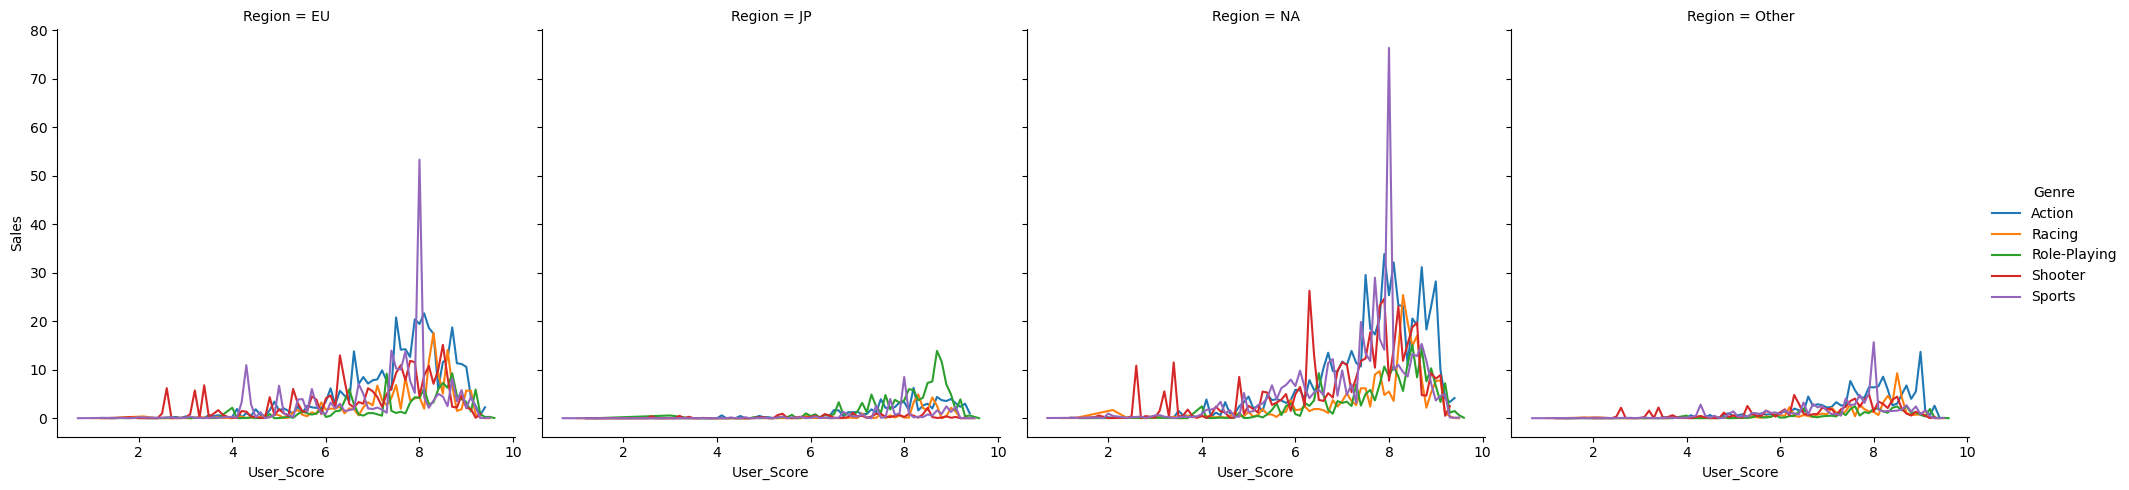

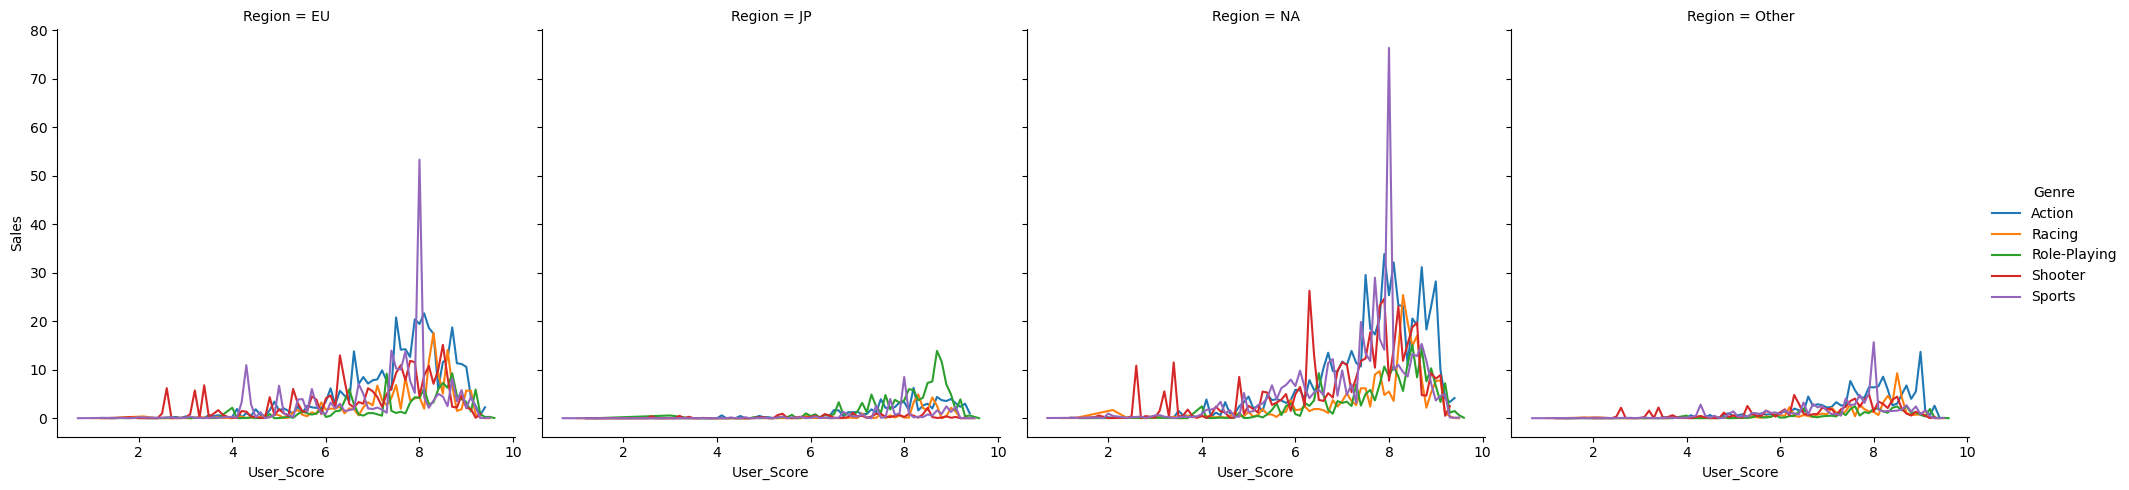

In [324]:
user = user[user['Genre'].isin(top_genre)]
user_score = user.groupby(['Region','Genre','User_Score'])[['Sales']].sum().reset_index()

us = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line')
user_score['User_Score'] = pd.to_numeric(user_score['User_Score'], errors='coerce')
user_score = sns.relplot(data = user_score, x = 'User_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line')


In [325]:
critic_sales = df[['Year', 'Global', 'Name', 'Critic_Score']]

In [326]:
critic_sales.head(20)

,Year,Global,Name,Critic_Score
0,2006,82.53,Wii Sports,76.0
2,2008,35.52,Mario Kart Wii,82.0
3,2009,32.77,Wii Sports Resort,80.0
6,2006,29.80,New Super Mario Bros.,89.0
7,2006,28.92,Wii Play,58.0
8,2009,28.32,New Super Mario Bros. Wii,87.0
11,2005,23.21,Mario Kart DS,91.0
13,2007,22.70,Wii Fit,80.0
14,2010,21.81,Kinect Adventures!,61.0
15,2009,21.79,Wii Fit Plus,80.0


In [327]:
critic_sales_max = critic_sales[
    critic_sales.groupby('Year')['Global'].transform('max') == critic_sales['Global']
]

In [328]:
critic_sales_max

,Year,Global,Name,Critic_Score
0,2006,82.53,Wii Sports,76.0
2,2008,35.52,Mario Kart Wii,82.0
3,2009,32.77,Wii Sports Resort,80.0
11,2005,23.21,Mario Kart DS,91.0
13,2007,22.70,Wii Fit,80.0
14,2010,21.81,Kinect Adventures!,61.0
16,2013,21.04,Grand Theft Auto V,97.0
17,2004,20.81,Grand Theft Auto: San Andreas,95.0
24,2002,16.15,Grand Theft Auto: Vice City,95.0
28,2001,14.98,Gran Turismo 3: A-Spec,95.0


In [329]:
user_sales = df[['Year', 'Global', 'Name', 'User_Score']]

In [330]:
user_sales_max = user_sales[
    user_sales.groupby('Year')['Global'].transform('max') == user_sales['Global']
]

In [331]:
user_sales_max

,Year,Global,Name,User_Score
0,2006,82.53,Wii Sports,8.0
2,2008,35.52,Mario Kart Wii,8.3
3,2009,32.77,Wii Sports Resort,8.0
11,2005,23.21,Mario Kart DS,8.6
13,2007,22.70,Wii Fit,7.7
14,2010,21.81,Kinect Adventures!,6.3
16,2013,21.04,Grand Theft Auto V,8.2
17,2004,20.81,Grand Theft Auto: San Andreas,9.0
24,2002,16.15,Grand Theft Auto: Vice City,8.7
28,2001,14.98,Gran Turismo 3: A-Spec,8.4


C:\Users\ystfn\AppData\Local\Temp\ipykernel_25248\1811588233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_sales["User_Score"] = pd.to_numeric(user_sales["User_Score"], errors="coerce")


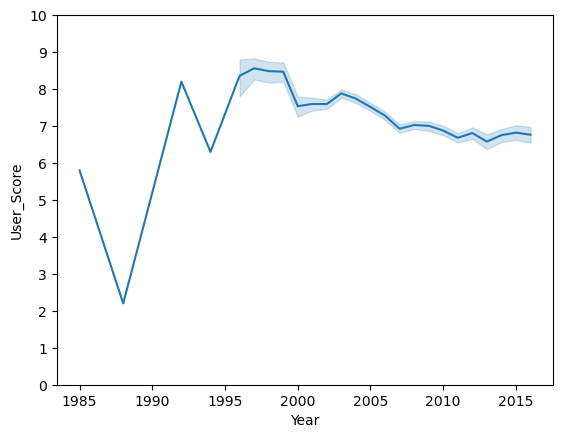

In [333]:
user_sales["User_Score"] = pd.to_numeric(user_sales["User_Score"], errors="coerce")
ax = sns.lineplot(data=user_sales, x="Year", y="User_Score")
ax.set_yticks(range(0, 11))


In [334]:
ax = sb.lineplot(data=critic_sales, x="Year", y="Critic_Score")
ax.set_yticks(range(0, 11))

NameError: name 'sb' is not defined

In [ ]:
ax = sb.lineplot(data=user_sales, x="Year", y="User_Score")
ax.set_yticks(range(0, 11))
